**Diabetic Prediction Using Machine Learning**

Following Machine Learning Algorithms are used for predicting diabetes in Pima Indians dataset.

1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Trees
4. Random Forest
5. K-Nearest Neighbors (kNN)
6. Naive Bayes
7. Extra Tree Classifier
8. Gradient Boosting
9. AdaBoost
10. XGBoost

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Python Libraries*

In [24]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
cmap1 = "YlGnBU"

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import time
from operator import truediv
import itertools

**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is an important step of data analysis, encompassing the visual and statistical synthesis of essential features within a dataset. Its principal objective is to glean insights into data structure, uncover patterns, and pinpoint potential irregularities. The process involves several crucial steps and employs various techniques to comprehensively understand and interpret the dataset.

In [25]:
# Read the dataset
data = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [26]:
# Get the dimentions of the dataset.
data.shape

(768, 9)

In [27]:
# Get the column names of the dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
# Get the data types of the different features/ columns
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
# Print the consise summary of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
# Compute a summary of statistics pertaining to the DataFrame columns
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Check the missing or null values in the data set
data.isnull().sum()
miss_val = data.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=data.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/data.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent


Data Visualizations

In [33]:
# For target value count
label_data = data['Outcome'].value_counts()
label_data

Outcome
0    500
1    268
Name: count, dtype: int64

In [34]:
colors = ['#b2ad7f', '#a2b9bc']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of Labels', 'Percentages'),specs=[[{"type": "xy"}, {'type': 'domain'}]])

x = [str(i) for i in data['Outcome'].value_counts().index.tolist()]
y = data['Outcome'].value_counts().values.tolist()

fig.add_trace(go.Bar(x = x, y = y, text = y,textposition = "auto",showlegend = False,marker=dict(color=colors,
                          line = dict(color = 'black', width = 2))), row=1, col=1)

fig.add_trace(go.Pie(labels = data['Outcome'].value_counts().keys(),values = data['Outcome'].value_counts().values,
                      pull = [0, 0.25], hoverinfo ='label', textinfo ='percent',
                      textfont_size = 20, textposition ='auto', marker=dict(colors=colors,line = dict(color = 'black', width = 2))), row=1, col=2)

fig.update_layout(title={'text': "Label Variable Distribution", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly_white')

iplot(fig)


In [35]:
for i in data.columns.values:
  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Quantiles", "Distribution"))

  fig.add_trace(go.Box(y = data[i],name = str(i),showlegend = False,
                        marker_color = "#A6D0DD"),
                        row = 1, col = 1)

  fig.add_trace(go.Histogram(x = data[i], xbins = dict(start = data[i].min(),end = data[i].max()),
                              showlegend = False, name = str(i),marker=dict(color="#0A4D68",
                                          line = dict(color = '#DBE6EC',width = 1))), row = 1, col = 2)

  fig.update_layout(title={'text': i.capitalize(), 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, template='plotly_white')

  iplot(fig)


In [36]:
for i in data.columns.values:
  x0 = data[data['Outcome']==0][i]
  x1 = data[data['Outcome']==1][i]

  trace1 = go.Histogram(x = x0, name = "0",opacity = 0.75, marker=dict(color="#0A4D68", line = dict(color = '#DBE6EC', width = 1)))

  trace2 = go.Histogram(x = x1, name = "1", opacity = 0.75, marker=dict(color="#A6D0DD", line = dict(color = '#DBE6EC', width = 1)))

  dt = [trace1, trace2]

  layout = go.Layout(title={'text': i, 'y':0.9, 'x':0.5, 'xanchor':'center', 'yanchor':'top'}, barmode='overlay', yaxis=dict(title='Count'), template = 'plotly_white')

  fig = go.Figure(data=dt, layout=layout)

  iplot(fig)

In [37]:
# Correlation for all features in the dataset
correlation_data =data.corr()
#print(correlation_data)

<Axes: >

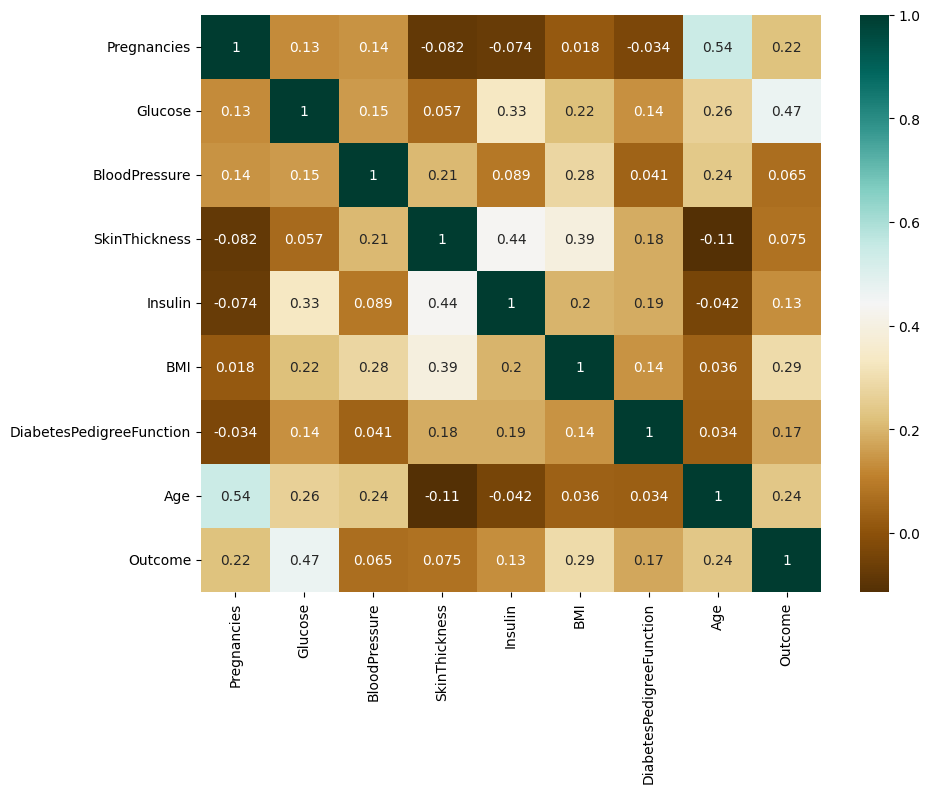

In [38]:
# Visulaization for correlation
plt.figure(figsize=(10,7.5))
sns.heatmap(correlation_data, annot=True, cmap='BrBG')

In [39]:
for i in data.columns.values:
  trace0 = go.Box(y = data[i], name = "All Points", jitter = 0.3, pointpos = -1.8,boxpoints = 'all', marker = dict(color = '#a2b9bc'), line = dict(color = '#6b5b95'))

  trace1 = go.Box(y = data[i], name = "Only Whiskers", boxpoints = False, marker = dict(color = '#b2ad7f'), line = dict(color = '#feb236'))

  trace2 = go.Box(y = data[i], name = "Suspected Outliers", boxpoints = 'suspectedoutliers', marker = dict(color = '#b5e7a0', outliercolor = '#878f99',
                line = dict(outliercolor = '#d64161', outlierwidth = 2)), line = dict(color = '#86af49'))

  trace3 = go.Box(y = data[i], name = "Whiskers and Outliers", boxpoints = 'outliers', marker = dict(color = '#6b5b95'), line = dict(color = '#ff7b25'))

  dt = [trace0,trace1,trace2,trace3]

  layout = go.Layout(title = "{} Outliers".format(i))

  layout = go.Layout(title={'text': i,'y':0.9,'x':0.5,'xanchor':'center','yanchor':'top'}, barmode='overlay', yaxis=dict(title='Count'), template = 'plotly_white')

  fig = go.Figure(data=dt,layout=layout)

  iplot(fig)


**Data Preprocessing**
Data pre-processing is a crucial phase in building ML, as it helps to make raw data suitable for analysis. Real-world data often suffers from various issues such as noise, incompleteness, and inaccuracies. These issues can influence the accuracy, precision and quality of the framework’s output. Pre-processing aims to ameliorate the worth of the data by eliminating duplicates and anomalies, standardizing it for comparison, and enhancing the findings. Through pre-processing, data can be made consistent and reliable for analysis.

In [40]:
# Splitting dataset to dependent and independent variable
x = data.drop(['Outcome'], axis=1)


Feature Scaling

In [41]:
# Create scaler
scaler = MinMaxScaler()
# Fit and transform the data
X = scaler.fit_transform(x)

In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the scaled data
X = scaler.fit_transform(x)


Feature Engineering

In [43]:
# Convert the scaled features back to a DataFrame
X = pd.DataFrame(X, columns=x.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [44]:
# Create a new column 'AgeGroup' based on age categories
X['AgeGroup'] = pd.cut(data['Age'], bins=[18, 31, 46, 66, float('inf')], labels=['Young', 'MiddleAge', 'LateMiddleAge', 'Old'])

In [45]:
X['BMICategory'] = pd.cut(data['BMI'], bins=[0, 18.5, 25.0, 30.0, 35.0, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'ExtremelyObese'])

In [46]:
X['InsulinStatus'] = data['Insulin'].apply(lambda x: "Normal" if 120 < x >= 120 else "Abnormal")

In [47]:
X['PregnancyStatus'] = data['Pregnancies'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [48]:
X['IsObese'] = data['BMI'].apply(lambda x: 'No' if x < 30 else 'Yes')

In [49]:
colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
          '#d64161', '#86af49', '#ff7b25']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Count Plot', 'Percentages'),specs=[[{"type": "xy"}, {'type': 'domain'}]])

x = [str(i) for i in X['AgeGroup'].value_counts().index.tolist()]
y = X['AgeGroup'].value_counts().values.tolist()

fig.add_trace(go.Bar(x = x, y = y, text = y,textposition = "auto",showlegend = False,marker=dict(color=colors,
                          line = dict(color = 'black', width = 2))), row=1, col=1)

fig.add_trace(go.Pie(labels = X['AgeGroup'].value_counts().keys(),values = X['AgeGroup'].value_counts().values,
                      hoverinfo ='label', textinfo ='percent',
                      textfont_size = 20, textposition ='auto', marker=dict(colors=colors,line = dict(color = 'black', width = 2))), row=1, col=2)



fig.update_layout(title={'text': "Age Group Distribution", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly_white')

iplot(fig)

In [50]:
colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
          '#d64161', '#86af49', '#ff7b25']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Count Plot', 'Percentages'),specs=[[{"type": "xy"}, {'type': 'domain'}]])

x = [str(i) for i in X['BMICategory'].value_counts().index.tolist()]
y = X['BMICategory'].value_counts().values.tolist()

fig.add_trace(go.Bar(x = x, y = y, text = y,textposition = "auto",showlegend = False,marker=dict(color=colors,
                          line = dict(color = 'black', width = 2))), row=1, col=1)

fig.add_trace(go.Pie(labels = X['BMICategory'].value_counts().keys(),values = X['BMICategory'].value_counts().values,
                      hoverinfo ='label', textinfo ='percent',
                      textfont_size = 20, textposition ='auto', marker=dict(colors=colors,line = dict(color = 'black', width = 2))), row=1, col=2)



fig.update_layout(title={'text': "BMI Category Distribution", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly_white')

iplot(fig)

In [51]:
colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
          '#d64161', '#86af49', '#ff7b25']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Count Plot', 'Percentages'),specs=[[{"type": "xy"}, {'type': 'domain'}]])

x = [str(i) for i in X['InsulinStatus'].value_counts().index.tolist()]
y = X['InsulinStatus'].value_counts().values.tolist()

fig.add_trace(go.Bar(x = x, y = y, text = y,textposition = "auto",showlegend = False,marker=dict(color=colors,
                          line = dict(color = 'black', width = 2))), row=1, col=1)

fig.add_trace(go.Pie(labels = X['InsulinStatus'].value_counts().keys(),values = X['InsulinStatus'].value_counts().values,
                      hoverinfo ='label', textinfo ='percent',
                      textfont_size = 20, textposition ='auto', marker=dict(colors=colors,line = dict(color = 'black', width = 2))), row=1, col=2)



fig.update_layout(title={'text': "Insulin Status Distribution", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly_white')

iplot(fig)

In [52]:
colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
          '#d64161', '#86af49', '#ff7b25']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Count Plot', 'Percentages'),specs=[[{"type": "xy"}, {'type': 'domain'}]])

x = [str(i) for i in X['PregnancyStatus'].value_counts().index.tolist()]
y = X['PregnancyStatus'].value_counts().values.tolist()

fig.add_trace(go.Bar(x = x, y = y, text = y,textposition = "auto",showlegend = False,marker=dict(color=colors,
                          line = dict(color = 'black', width = 2))), row=1, col=1)

fig.add_trace(go.Pie(labels = X['PregnancyStatus'].value_counts().keys(),values = X['PregnancyStatus'].value_counts().values,
                      hoverinfo ='label', textinfo ='percent',
                      textfont_size = 20, textposition ='auto', marker=dict(colors=colors,line = dict(color = 'black', width = 2))), row=1, col=2)



fig.update_layout(title={'text': "Pregnancy Status Distribution", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly_white')

iplot(fig)

In [53]:
colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
          '#d64161', '#86af49', '#ff7b25']

fig = make_subplots(rows=1, cols=2, subplot_titles=('Count Plot', 'Percentages'),specs=[[{"type": "xy"}, {'type': 'domain'}]])

x = [str(i) for i in X['IsObese'].value_counts().index.tolist()]
y = X['IsObese'].value_counts().values.tolist()

fig.add_trace(go.Bar(x = x, y = y, text = y,textposition = "auto",showlegend = False,marker=dict(color=colors,
                          line = dict(color = 'black', width = 2))), row=1, col=1)

fig.add_trace(go.Pie(labels = X['IsObese'].value_counts().keys(),values = X['IsObese'].value_counts().values,
                      hoverinfo ='label', textinfo ='percent',
                      textfont_size = 20, textposition ='auto', marker=dict(colors=colors,line = dict(color = 'black', width = 2))), row=1, col=2)



fig.update_layout(title={'text': "Is Obese Distribution", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly_white')

iplot(fig)

In [54]:
X = pd.get_dummies(X, columns=['AgeGroup', 'BMICategory', 'InsulinStatus', 'PregnancyStatus', 'IsObese'])

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeGroup_Young,AgeGroup_MiddleAge,...,BMICategory_Normal,BMICategory_Overweight,BMICategory_Obese,BMICategory_ExtremelyObese,InsulinStatus_Abnormal,InsulinStatus_Normal,PregnancyStatus_No,PregnancyStatus_Yes,IsObese_No,IsObese_Yes
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,False,False,...,False,False,True,False,True,False,False,True,False,True
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,True,False,...,False,True,False,False,True,False,False,True,True,False
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,False,True,...,True,False,False,False,True,False,False,True,True,False
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,True,False,...,False,True,False,False,True,False,False,True,True,False
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,False,True,...,False,False,False,True,False,True,True,False,False,True


In [56]:
robustScalar = RobustScaler()
X = robustScalar.fit_transform(X)

In [57]:
X.shape

(768, 23)

In [58]:
# Extract the target vector y
y = data['Outcome']

In [59]:
y.shape

(768,)

Splitting dataset into training and testing subsets

In [60]:
# Splitting the datasets for training and testing process
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 42)

In [61]:
x_train.shape

(614, 23)

In [62]:
x_test.shape

(154, 23)

In [63]:
y_train.shape

(614,)

In [64]:
y_test.shape

(154,)

**Logistic Regression**

In [65]:
# Define hyperparameters to tune
pipeline = Pipeline([
    ('pca', PCA()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  # Default logistic regression settings
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength for logistic regression
    'logreg__penalty': ['l2'],  # Penalty type for logistic regression (L1 or L2)
    'logreg__solver': ['lbfgs']  # Solver algorithm for logistic regression
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)



Best Hyperparameters: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs', 'pca__n_components': 15}
Best Cross-validation Score: 0.7817939490870318


In [66]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [67]:
training_start = time.perf_counter()
# Predict the labels for the training set
logreg_train = best_estimator.predict(x_train)
#logreg_train = logreg.fit(x_train, y_train)
training_end = time.perf_counter()

Making Predictions

In [68]:
prediction_start = time.perf_counter()
# Predict the labels for the testing set
preds_logreg = best_estimator.predict(x_test)
#preds_logreg = logreg.predict(x_test)
prediction_end = time.perf_counter()

In [69]:
train_acc_logreg = accuracy_score(y_train, logreg_train)
print("Logistic Regression's Training accuracy is: ",np.round(train_acc_logreg, 4)*100)

Logistic Regression's Training accuracy is:  79.80000000000001


In [70]:
test_acc_logreg = accuracy_score(y_test, preds_logreg)
print("Logistic Regression's prediction accuracy is: ", np.round(test_acc_logreg, 4)*100)

Logistic Regression's prediction accuracy is:  75.97


In [71]:
logreg_train_time = training_end-training_start
logreg_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (logreg_train_time))
print("Time consumed for prediction: %6.5f seconds" % (logreg_prediction_time))

Time consumed for training: 0.001
Time consumed for prediction: 0.00179 seconds


Evaluating the model
Following are used
1. Precision
2. Recall
3. F1-Score
4. Accuracy
5. Confusion Matrix
6. ROC Curve



In [72]:
# precision tp / (tp + fp)
precision_logreg = precision_score(y_test, preds_logreg,average='macro')
print('Precision: %f' % precision_logreg)
# recall: tp / (tp + fn)
recall_logreg = recall_score(y_test, preds_logreg, average='macro')
print('Recall: %f' % recall_logreg)
# f1: 2 tp / (2 tp + fp + fn)
f1_logreg = f1_score(y_test, preds_logreg,average='macro')
print('F1 score: %f' % f1_logreg)

Precision: 0.738520
Recall: 0.740404
F1 score: 0.739425


In [73]:
cm_logreg= confusion_matrix(y_test, preds_logreg)
print(cm_logreg)
print(classification_report(y_test, preds_logreg))

[[80 19]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



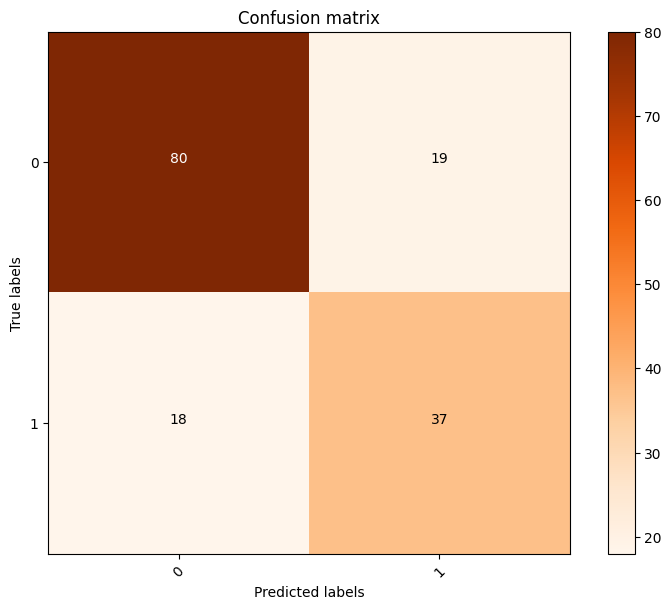

In [74]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_logreg, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_logreg = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis]

thresh = cm_logreg.max() / 1.5 if normalize else cm_logreg.max() / 2
for i, j in itertools.product(range(cm_logreg.shape[0]), range(cm_logreg.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_logreg[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_logreg[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_logreg[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_logreg[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [75]:
auc_logreg = roc_auc_score(y_test, preds_logreg)
print('AUC: ', round(auc_logreg, 4))

AUC:  0.7404


In [76]:
fpr, tpr, thresholds = roc_curve(y_test, preds_logreg)

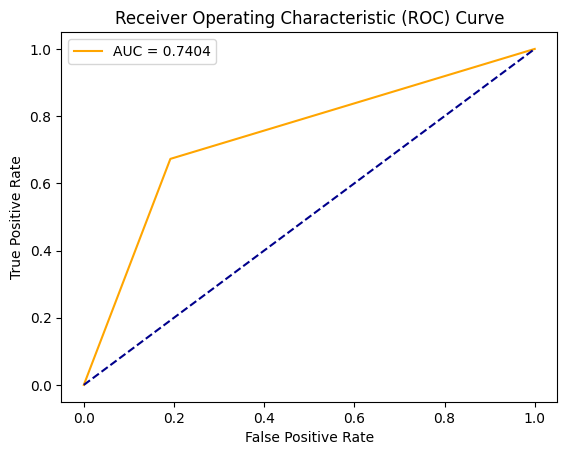

In [77]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_logreg, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Support Vector Machine**

In [78]:
# Define the pipeline
pipeline = Pipeline([
    ('pca', PCA()),  # PCA for dimensionality reduction
    ('svm', SVC(random_state = 42, probability = True))  # Support Vector Machine classifier
])

# Define hyperparameters to tune
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly' kernels
    'svm__degree': [2, 3, 4]  # Degree of the polynomial kernel
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'pca__n_components': 20, 'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-validation Score: 0.7801812608290019


In [79]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [80]:
# Training the model
training_start = time.perf_counter()
# Predict the labels for the training set
svc_train = best_estimator.predict(x_train)
#svc_train = svc.fit(x_train, y_train)
training_end = time.perf_counter()

Making Predictions

In [81]:
prediction_start = time.perf_counter()
# Predict the labels for the testing set
preds_svc = best_estimator.predict(x_test)
#preds_svc = svc.predict(x_test)
prediction_end = time.perf_counter()

In [82]:
train_acc_svc = accuracy_score(y_train, svc_train)
print("SVM's Training accuracy is: ",np.round(train_acc_svc, 4)*100)

SVM's Training accuracy is:  84.04


In [83]:
test_acc_svc = accuracy_score(y_test, preds_svc)
print("SVM's prediction accuracy is: ", np.round(test_acc_svc, 4)*100)

SVM's prediction accuracy is:  75.32


In [84]:
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Time consumed for training: 0.035
Time consumed for prediction: 0.00933 seconds


Evaluating the model Following are used

1. Precision
2. Recall
3. F1-Score
4. Accuracy
5. Confusion Matrix
6. ROC Curve

In [85]:
# precision tp / (tp + fp)
precision_svc = precision_score(y_test, preds_svc,average='macro')
print('Precision: %f' % precision_svc)
# recall: tp / (tp + fn)
recall_svc = recall_score(y_test, preds_svc, average='macro')
print('Recall: %f' % recall_svc)
# f1: 2 tp / (2 tp + fp + fn)
f1_svc = f1_score(y_test, preds_svc,average='macro')
print('F1 score: %f' % f1_svc)

Precision: 0.731179
Recall: 0.727273
F1 score: 0.729074


In [86]:
cm_svc= confusion_matrix(y_test, preds_svc)

print(cm_svc)
print(classification_report(y_test, preds_svc))

[[81 18]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



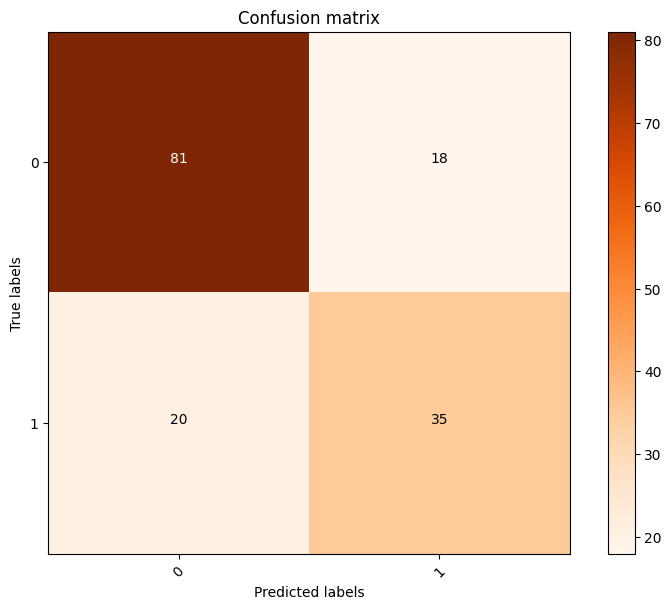

In [87]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_svc, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_svc = cm_svc.astype('float') / cm_svc.sum(axis=1)[:, np.newaxis]

thresh = cm_svc.max() / 1.5 if normalize else cm_svc.max() / 2
for i, j in itertools.product(range(cm_svc.shape[0]), range(cm_svc.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_svc[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_svc[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_svc[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_svc[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [88]:
auc_svc = roc_auc_score(y_test, preds_svc)
print('AUC: ', round(auc_svc, 4))

AUC:  0.7273


In [89]:
fpr, tpr, thresholds = roc_curve(y_test, preds_svc)

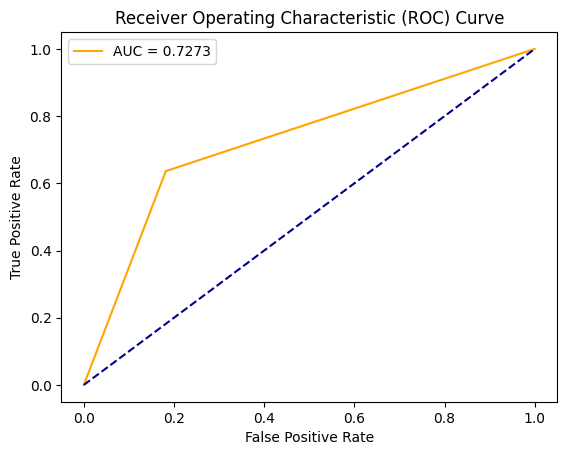

In [90]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_svc, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Decision Tress**

In [91]:
# Define the pipeline
pipeline = Pipeline([
    ('pca', PCA()),  # PCA for dimensionality reduction
    ('dt', DecisionTreeClassifier(random_state = 42))  # Decision Tree classifier
])

# Define hyperparameters to tune
param_grid = {
    'pca__n_components': [15, 20, 23],  # Number of principal components for PCA
    'dt__criterion': ['gini', 'entropy'],  # Criterion for splitting
    'dt__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'dt__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'dt__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'dt__max_features': ['sqrt'],  # Maximum number of features to consider for splitting
    'dt__ccp_alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005]  # Cost-complexity pruning parameter
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'dt__ccp_alpha': 0.005, 'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2, 'pca__n_components': 15}
Best Cross-validation Score: 0.7410102625616419


In [92]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [93]:
training_start = time.perf_counter()
dt_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [94]:
prediction_start = time.perf_counter()
preds_dt = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [95]:
train_acc_dt = accuracy_score(y_train, dt_train)
print("Decision Tree's Training accuracy is: ",np.round(train_acc_dt, 4)*100)

Decision Tree's Training accuracy is:  83.06


In [96]:
test_acc_dt = accuracy_score(y_test, preds_dt)
print("Decision Tress's prediction accuracy is: ", np.round(test_acc_dt, 4)*100)

Decision Tress's prediction accuracy is:  72.08


In [97]:
dt_train_time = training_end-training_start
dt_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (dt_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dt_prediction_time))

Time consumed for training: 0.002
Time consumed for prediction: 0.00125 seconds


In [98]:
# precision tp / (tp + fp)
precision_dt = precision_score(y_test, preds_dt,average='macro')
print('Precision: %f' % precision_dt)
# recall: tp / (tp + fn)
recall_dt = recall_score(y_test, preds_dt, average='macro')
print('Recall: %f' % recall_dt)
# f1: 2 tp / (2 tp + fp + fn)
f1_dt = f1_score(y_test, preds_dt,average='macro')
print('F1 score: %f' % f1_dt)

Precision: 0.702431
Recall: 0.714141
F1 score: 0.705571


In [99]:
cm_dt= confusion_matrix(y_test, preds_dt)

print(cm_dt)
print(classification_report(y_test, preds_dt))

[[73 26]
 [17 38]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154



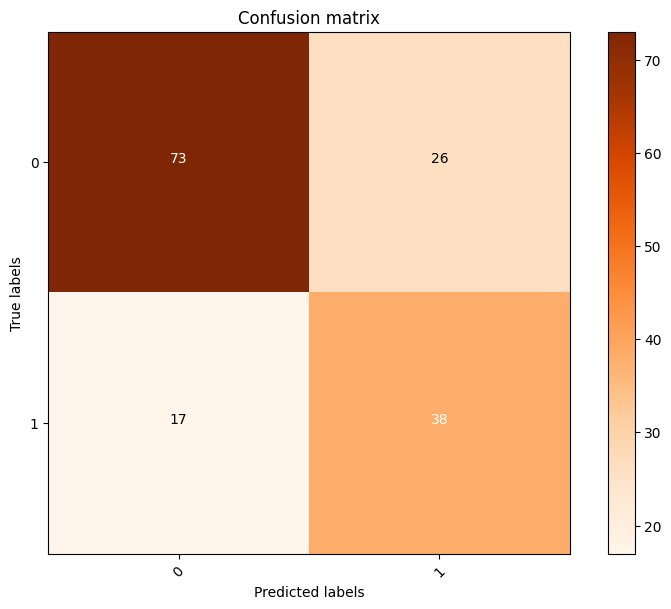

In [100]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_dt, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]

thresh = cm_dt.max() / 1.5 if normalize else cm_dt.max() / 2
for i, j in itertools.product(range(cm_dt.shape[0]), range(cm_dt.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_dt[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_dt[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_dt[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_dt[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [101]:
auc_dt = roc_auc_score(y_test, preds_dt)
print('AUC: ', round(auc_dt, 4))

AUC:  0.7141


In [102]:
fpr, tpr, thresholds = roc_curve(y_test, preds_dt)

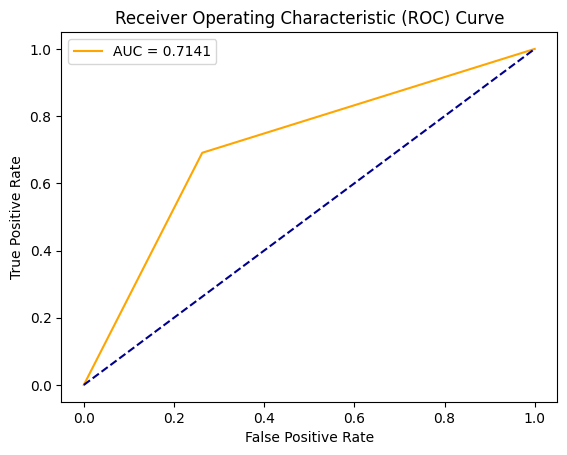

In [103]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_dt, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Random Forest**

In [104]:
# Define the pipeline with PCA and RandomForestClassifier
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('rf', RandomForestClassifier())  # RandomForestClassifier with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'rf__n_estimators': [50, 100],  # Number of trees in the forest
    'rf__max_depth': [5, 10],  # Maximum depth of the trees
    'rf__min_samples_split': [5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'rf__ccp_alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005]  # Cost-complexity pruning parameter
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)

Best Hyperparameters: {'pca__n_components': 10, 'rf__ccp_alpha': 0.004, 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best Cross-validation Score: 0.7866453418632547


In [105]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [106]:
training_start = time.perf_counter()
rf_train =  best_estimator.predict(x_train)
training_end = time.perf_counter()

In [107]:
prediction_start = time.perf_counter()
preds_rf =  best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [108]:
train_acc_rf = accuracy_score(y_train, rf_train)
print("Random Forest's Training accuracy is: ",np.round(train_acc_rf, 4)*100)

Random Forest's Training accuracy is:  93.16


In [109]:
test_acc_rf = accuracy_score(y_test, preds_svc)
print("Random Forest's prediction accuracy is: ", np.round(test_acc_rf, 4)*100)

Random Forest's prediction accuracy is:  75.32


In [110]:
rf_train_time = training_end-training_start
rf_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (rf_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rf_prediction_time))

Time consumed for training: 0.019
Time consumed for prediction: 0.01571 seconds


In [111]:
# precision tp / (tp + fp)
precision_rf = precision_score(y_test, preds_rf,average='macro')
print('Precision: %f' % precision_rf)
# recall: tp / (tp + fn)
recall_rf = recall_score(y_test, preds_rf, average='macro')
print('Recall: %f' % recall_rf)
# f1: 2 tp / (2 tp + fp + fn)
f1_rf = f1_score(y_test, preds_rf,average='macro')
print('F1 score: %f' % f1_rf)

Precision: 0.746939
Recall: 0.733333
F1 score: 0.738688


In [112]:
cm_rf= confusion_matrix(y_test, preds_rf)

print(cm_rf)
print(classification_report(y_test, preds_rf))

[[84 15]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



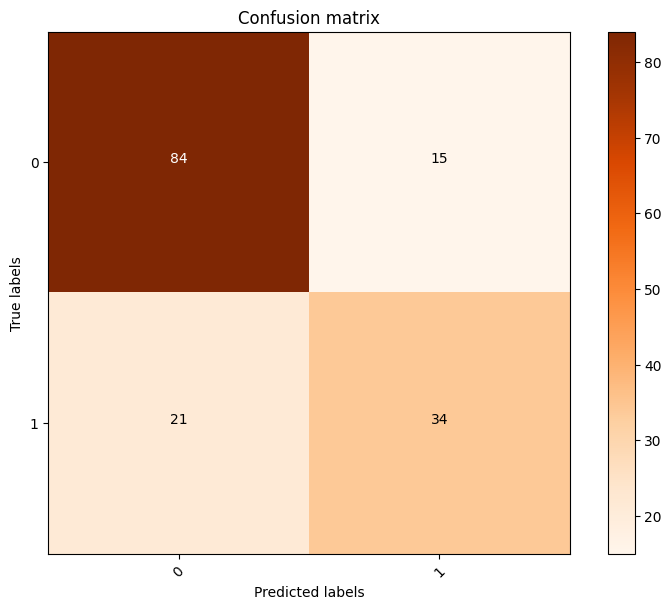

In [113]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]

thresh = cm_rf.max() / 1.5 if normalize else cm_rf.max() / 2
for i, j in itertools.product(range(cm_rf.shape[0]), range(cm_rf.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_rf[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_rf[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_rf[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_rf[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [114]:
auc_rf = roc_auc_score(y_test, preds_rf)
print('AUC: ', round(auc_rf, 4))

AUC:  0.7333


In [115]:
fpr, tpr, thresholds = roc_curve(y_test, preds_rf)

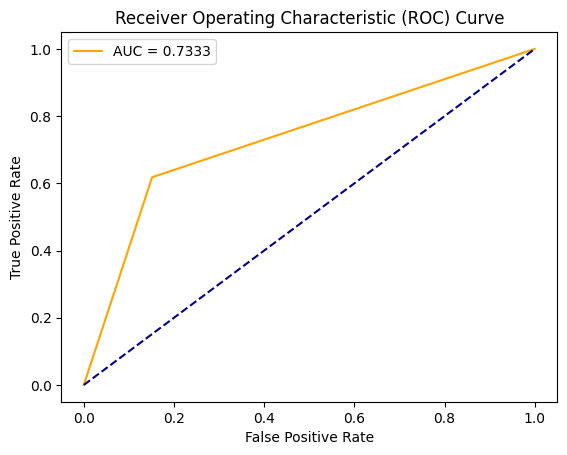

In [116]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_rf, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**K-Nearest Neighbors (KNN)**

In [117]:
# Define the pipeline with PCA and KNeighborsClassifier
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('knn', KNeighborsClassifier())  # KNeighborsClassifier with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for computing nearest neighbors
    'knn__p': [1, 2]  # Power parameter for the Minkowski metric
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform', 'pca__n_components': 10}
Best Cross-validation Score: 0.7736238837798215


In [118]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [119]:
training_start = time.perf_counter()
knn_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [120]:
prediction_start = time.perf_counter()
preds_knn = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [121]:
train_acc_knn = accuracy_score(y_train, knn_train)
print("KNN's Training accuracy is: ",np.round(train_acc_knn, 4)*100)

KNN's Training accuracy is:  83.88


In [122]:
test_acc_knn = accuracy_score(y_test, preds_knn)
print("KNN's prediction accuracy is: ", np.round(test_acc_knn, 4)*100)

KNN's prediction accuracy is:  74.68


In [123]:
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Time consumed for training: 0.099
Time consumed for prediction: 0.02575 seconds


In [124]:
# precision tp / (tp + fp)
precision_knn = precision_score(y_test, preds_knn,average='macro')
print('Precision: %f' % precision_knn)
# recall: tp / (tp + fn)
recall_knn = recall_score(y_test, preds_knn, average='macro')
print('Recall: %f' % recall_knn)
# f1: 2 tp / (2 tp + fp + fn)
f1_knn = f1_score(y_test, preds_knn,average='macro')
print('F1 score: %f' % f1_knn)

Precision: 0.725845
Recall: 0.706061
F1 score: 0.712728


In [125]:
cm_knn= confusion_matrix(y_test, preds_knn)

print(cm_knn)
print(classification_report(y_test, preds_knn))

[[84 15]
 [24 31]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        99
           1       0.67      0.56      0.61        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



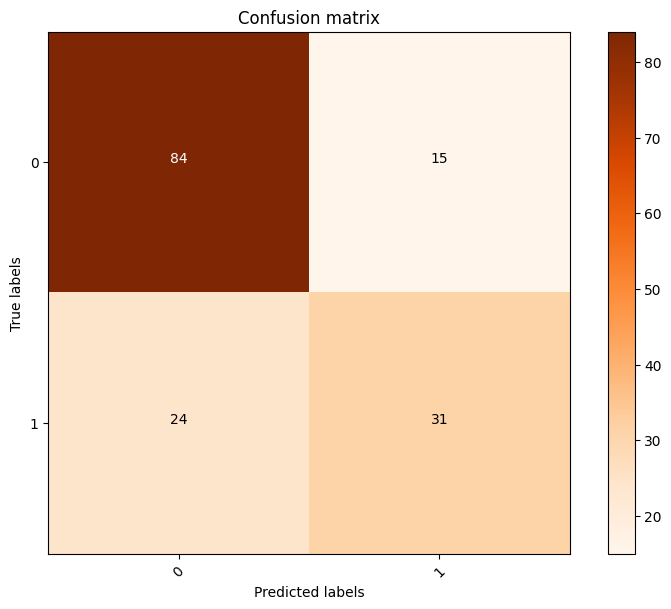

In [126]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_knn, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]

thresh = cm_knn.max() / 1.5 if normalize else cm_knn.max() / 2
for i, j in itertools.product(range(cm_knn.shape[0]), range(cm_knn.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_knn[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_knn[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_knn[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_knn[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [127]:
auc_knn = roc_auc_score(y_test, preds_knn)
print('AUC: ', round(auc_knn, 4))

AUC:  0.7061


In [128]:
fpr, tpr, thresholds = roc_curve(y_test, preds_knn)

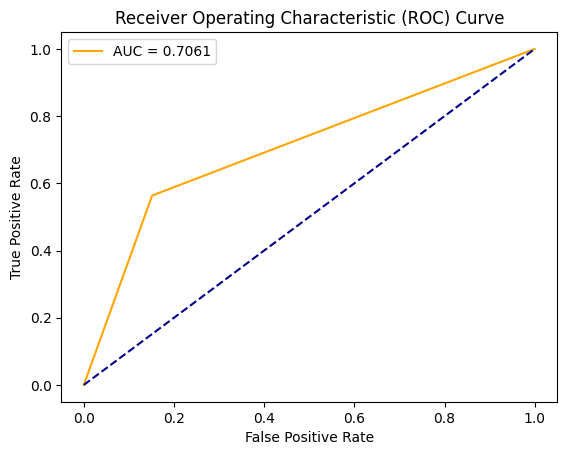

In [129]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_knn, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Naive Bayes**

In [130]:
# Define the pipeline with PCA and Naive Bayes
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('nb', GaussianNB())  # Gaussian Naive Bayes with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Portion of the largest variance of all features to add to variances for stability
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)

Best Hyperparameters: {'nb__var_smoothing': 1e-09, 'pca__n_components': 10}
Best Cross-validation Score: 0.7541250166600026


In [131]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [132]:
training_start = time.perf_counter()
nb_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [133]:
prediction_start = time.perf_counter()
preds_nb = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [135]:
train_acc_nb = accuracy_score(y_train, nb_train)
print("Naive Bayes's Training accuracy is: ",np.round(train_acc_nb, 4)*100)

Naive Bayes's Training accuracy is:  76.55


In [134]:
test_acc_nb = accuracy_score(y_test, preds_nb)
print("Naive Bayes's prediction accuracy is: ", np.round(test_acc_nb, 4)*100)

Naive Bayes's prediction accuracy is:  76.62


In [136]:
nb_train_time = training_end-training_start
nb_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (nb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (nb_prediction_time))

Time consumed for training: 0.001
Time consumed for prediction: 0.00270 seconds


In [137]:
# precision tp / (tp + fp)
precision_nb = precision_score(y_test, preds_nb,average='macro')
print('Precision: %f' % precision_nb)
# recall: tp / (tp + fn)
recall_nb = recall_score(y_test, preds_nb, average='macro')
print('Recall: %f' % recall_nb)
# f1: 2 tp / (2 tp + fp + fn)
f1_nb = f1_score(y_test, preds_nb,average='macro')
print('F1 score: %f' % f1_nb)

Precision: 0.747224
Recall: 0.757576
F1 score: 0.751078


In [138]:
cm_nb= confusion_matrix(y_test, preds_nb)

print(cm_nb)
print(classification_report(y_test, preds_nb))

[[78 21]
 [15 40]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



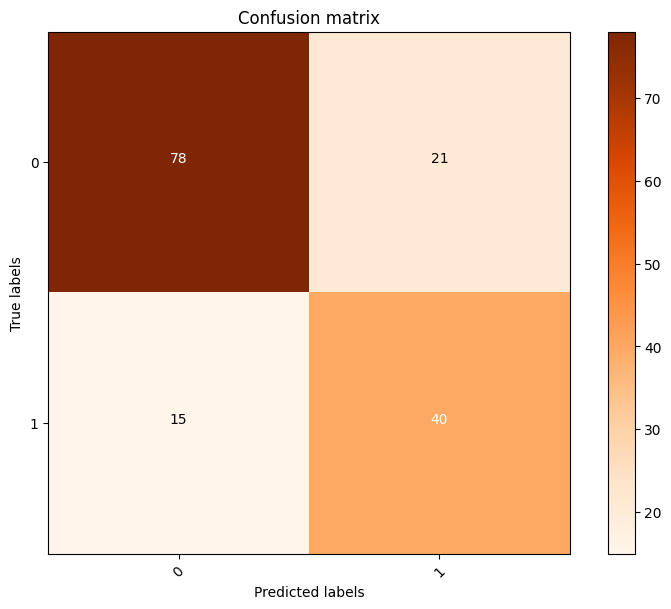

In [139]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_nb, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_nb = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis]

thresh = cm_nb.max() / 1.5 if normalize else cm_nb.max() / 2
for i, j in itertools.product(range(cm_nb.shape[0]), range(cm_nb.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_nb[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_nb[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_nb[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_nb[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [140]:
auc_nb = roc_auc_score(y_test, preds_nb)
print('AUC: ', round(auc_nb, 4))

AUC:  0.7576


In [141]:
fpr, tpr, thresholds = roc_curve(y_test, preds_nb)

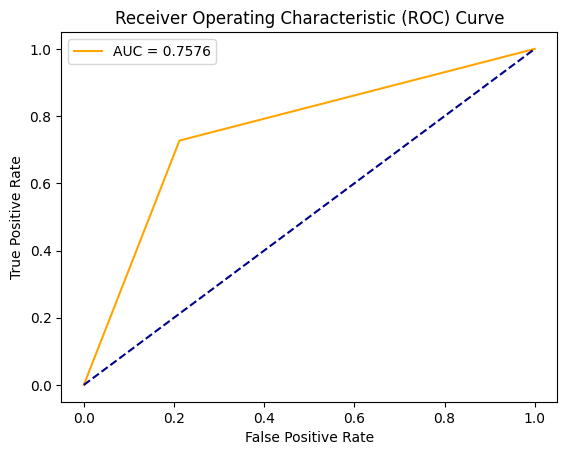

In [142]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_nb, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Extra Tree Classifier**

In [143]:
# Define the pipeline with PCA and Extra Trees Classifier
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('et', ExtraTreesClassifier(random_state=42))  # Extra Trees Classifier with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'et__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'et__criterion': ['gini', 'entropy'],  # Criterion for splitting
    'et__max_depth': [None, 10, 20],  # Maximum depth of the trees
    'et__min_samples_split': [5, 10, 15],  # Minimum number of samples required to split a node
    'et__min_samples_leaf': [2, 4, 6]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'et__criterion': 'gini', 'et__max_depth': None, 'et__min_samples_leaf': 2, 'et__min_samples_split': 15, 'et__n_estimators': 150, 'pca__n_components': 10}
Best Cross-validation Score: 0.7866986538717846


In [144]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [145]:
training_start = time.perf_counter()
et_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [146]:
prediction_start = time.perf_counter()
preds_et = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [147]:
train_acc_et = accuracy_score(y_train, et_train)
print("Extra Tree Classifier Training accuracy is: ",np.round(train_acc_et, 4)*100)

Extra Tree Classifier Training accuracy is:  89.58


In [148]:
test_acc_et = accuracy_score(y_test, preds_et)
print("Extra Tree Classifier prediction accuracy is: ", np.round(test_acc_et, 4)*100)

Extra Tree Classifier prediction accuracy is:  76.62


In [149]:
et_train_time = training_end-training_start
et_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (et_train_time))
print("Time consumed for prediction: %6.5f seconds" % (et_prediction_time))

Time consumed for training: 0.032
Time consumed for prediction: 0.02324 seconds


In [150]:
# precision tp / (tp + fp)
precision_et = precision_score(y_test, preds_et,average='macro')
print('Precision: %f' % precision_et)
# recall: tp / (tp + fn)
recall_et = recall_score(y_test, preds_et, average='macro')
print('Recall: %f' % recall_et)
# f1: 2 tp / (2 tp + fp + fn)
f1_et = f1_score(y_test, preds_et,average='macro')
print('F1 score: %f' % f1_et)

Precision: 0.748260
Recall: 0.729293
F1 score: 0.736151


In [151]:
cm_et= confusion_matrix(y_test, preds_et)

print(cm_et)
print(classification_report(y_test, preds_et))

[[85 14]
 [22 33]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



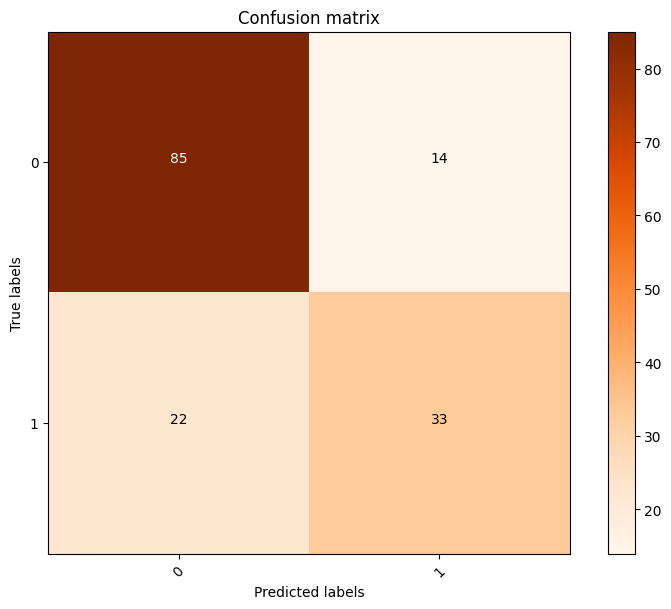

In [152]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_et, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_et = cm_et.astype('float') / cm_et.sum(axis=1)[:, np.newaxis]

thresh = cm_et.max() / 1.5 if normalize else cm_et.max() / 2
for i, j in itertools.product(range(cm_et.shape[0]), range(cm_et.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_et[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_et[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_et[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_et[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [153]:
auc_et = roc_auc_score(y_test, preds_et)
print('AUC: ', round(auc_et, 4))

AUC:  0.7293


In [154]:
fpr, tpr, thresholds = roc_curve(y_test, preds_et)

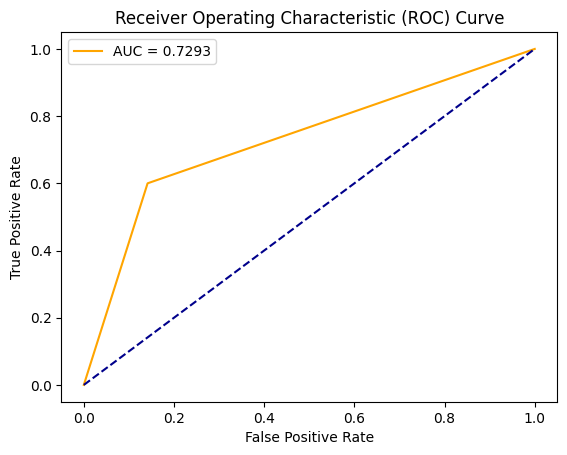

In [155]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_et, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Gradient Boosting**

In [156]:
# Define the pipeline with PCA and Extra Trees Classifier
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('gb', GradientBoostingClassifier(random_state=42))  # Extra Trees Classifier with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'gb__learning_rate': [0.1],  # Learning rate shrinks the contribution of each tree
    'gb__max_depth': [3],  # Maximum depth of the individual trees
    'gb__min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'gb__min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
    'gb__subsample': [1.0]  # Fraction of samples used for fitting the individual trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__min_samples_leaf': 1, 'gb__min_samples_split': 2, 'gb__subsample': 1.0, 'pca__n_components': 10}
Best Cross-validation Score: 0.7671464747434359


In [157]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [158]:
training_start = time.perf_counter()
gb_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [159]:
prediction_start = time.perf_counter()
preds_gb = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [160]:
train_acc_gb = accuracy_score(y_train, gb_train)
print("Gradeint Boossting's Training accuracy is: ",np.round(train_acc_gb, 4)*100)

Gradeint Boossting's Training accuracy is:  94.78999999999999


In [161]:
test_acc_gb = accuracy_score(y_test, preds_gb)
print("Gradeint Boossting's prediction accuracy is: ", np.round(test_acc_gb, 4)*100)

Gradeint Boossting's prediction accuracy is:  74.03


In [162]:
gb_train_time = training_end-training_start
gb_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (gb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gb_prediction_time))

Time consumed for training: 0.010
Time consumed for prediction: 0.00584 seconds


In [163]:
# precision tp / (tp + fp)
precision_gb = precision_score(y_test, preds_gb,average='macro')
print('Precision: %f' % precision_gb)
# recall: tp / (tp + fn)
recall_gb = recall_score(y_test, preds_gb, average='macro')
print('Recall: %f' % recall_gb)
# f1: 2 tp / (2 tp + fp + fn)
f1_gb = f1_score(y_test, preds_gb,average='macro')
print('F1 score: %f' % f1_gb)

Precision: 0.717172
Recall: 0.717172
F1 score: 0.717172


In [164]:
cm_gb= confusion_matrix(y_test, preds_gb)

print(cm_gb)
print(classification_report(y_test, preds_gb))

[[79 20]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



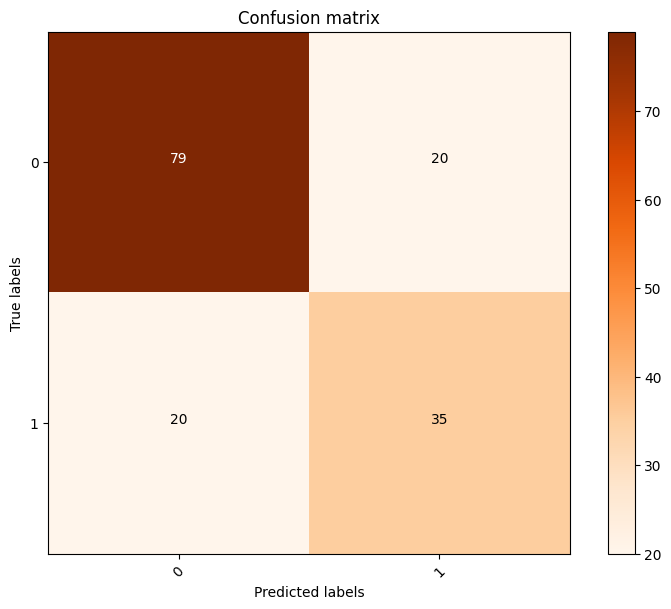

In [165]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_gb, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_gb = cm_gb.astype('float') / cm_gb.sum(axis=1)[:, np.newaxis]

thresh = cm_gb.max() / 1.5 if normalize else cm_gb.max() / 2
for i, j in itertools.product(range(cm_gb.shape[0]), range(cm_gb.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_gb[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_gb[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_gb[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_gb[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [166]:
auc_gb = roc_auc_score(y_test, preds_gb)
print('AUC: ', round(auc_gb, 4))

AUC:  0.7172


In [167]:
fpr, tpr, thresholds = roc_curve(y_test, preds_gb)

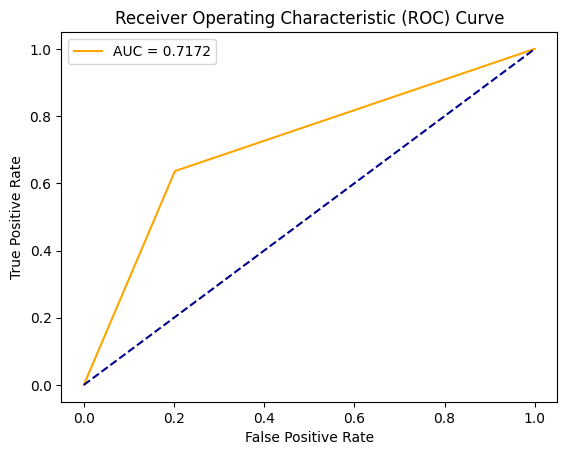

In [168]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_gb, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**AdaBoost**

In [169]:
# Define the pipeline with PCA and Extra Trees Classifier
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('ada', AdaBoostClassifier(random_state=42))  # Extra Trees Classifier with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'ada__n_estimators': [50, 100],  # Number of base estimators
    'ada__learning_rate': [1.0,0.1]  # Learning rate shrinks the contribution of each classifier
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'ada__learning_rate': 0.1, 'ada__n_estimators': 100, 'pca__n_components': 10}
Best Cross-validation Score: 0.7703985072637611


In [170]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [171]:
training_start = time.perf_counter()
ada_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [172]:
prediction_start = time.perf_counter()
preds_ada = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [173]:
train_acc_ada = accuracy_score(y_train, ada_train)
print("AdaBoost's Training accuracy is: ",np.round(train_acc_ada, 4)*100)

AdaBoost's Training accuracy is:  81.76


In [174]:
test_acc_ada = accuracy_score(y_test, preds_ada)
print("AdaBoost's prediction accuracy is: ", np.round(test_acc_ada, 4)*100)

AdaBoost's prediction accuracy is:  75.97


In [175]:
ada_train_time = training_end-training_start
ada_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (ada_train_time))
print("Time consumed for prediction: %6.5f seconds" % (ada_prediction_time))

Time consumed for training: 0.046
Time consumed for prediction: 0.02357 seconds


In [176]:
# precision tp / (tp + fp)
precision_ada = precision_score(y_test, preds_ada,average='macro')
print('Precision: %f' % precision_ada)
# recall: tp / (tp + fn)
recall_ada = recall_score(y_test, preds_ada, average='macro')
print('Recall: %f' % recall_ada)
# f1: 2 tp / (2 tp + fp + fn)
f1_ada = f1_score(y_test, preds_ada,average='macro')
print('F1 score: %f' % f1_ada)

Precision: 0.739976
Recall: 0.724242
F1 score: 0.730144


In [177]:
cm_ada= confusion_matrix(y_test, preds_ada)

print(cm_ada)
print(classification_report(y_test, preds_ada))

[[84 15]
 [22 33]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



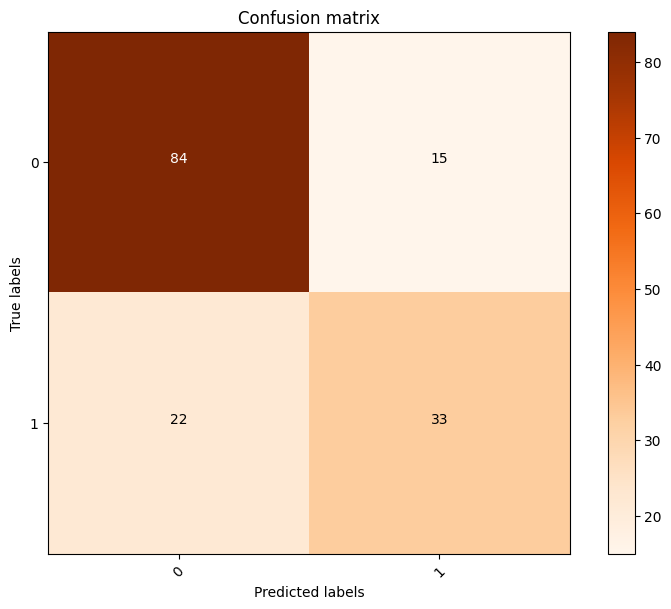

In [178]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_ada, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_ada = cm_ada.astype('float') / cm_ada.sum(axis=1)[:, np.newaxis]

thresh = cm_ada.max() / 1.5 if normalize else cm_ada.max() / 2
for i, j in itertools.product(range(cm_ada.shape[0]), range(cm_ada.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_ada[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_ada[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_ada[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_ada[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [179]:
auc_ada = roc_auc_score(y_test, preds_ada)
print('AUC: ', round(auc_ada, 4))

AUC:  0.7242


In [180]:
fpr, tpr, thresholds = roc_curve(y_test, preds_ada)

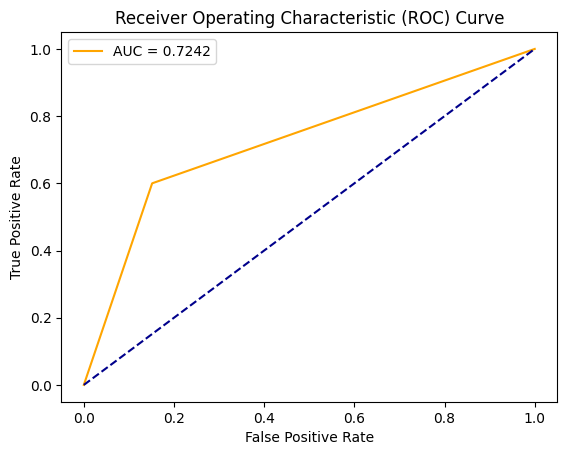

In [181]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_ada, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**XGBoost**

In [182]:
# Define the pipeline with PCA and Extra Trees Classifier
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('xgb', XGBClassifier(random_state=42))  # Extra Trees Classifier with default parameters
])

# Define hyperparameters to tune, including PCA parameters
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 23],  # Number of principal components for PCA
    'xgb__n_estimators': [10],
    'xgb__learning_rate': [0.3],
    'xgb__max_depth': [6],
    'xgb__min_child_weight': [1],
    'xgb__gamma': [0],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [1.0],
    'xgb__reg_alpha': [0],
    'xgb__reg_lambda': [1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the randomized search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-validation Score:", best_score)

Best Hyperparameters: {'pca__n_components': 23, 'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 10, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
Best Cross-validation Score: 0.7606424097027855


In [183]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

In [184]:
training_start = time.perf_counter()
xgb_train = best_estimator.predict(x_train)
training_end = time.perf_counter()

In [185]:
prediction_start = time.perf_counter()
preds_xgb = best_estimator.predict(x_test)
prediction_end = time.perf_counter()

In [186]:
train_acc_xgb = accuracy_score(y_train, xgb_train)
print("XGBoost's Training accuracy is: ",np.round(train_acc_xgb, 4)*100)

XGBoost's Training accuracy is:  95.93


In [187]:
test_acc_xgb = accuracy_score(y_test, preds_xgb)
print("XGBoost's prediction accuracy is: ", np.round(test_acc_xgb, 4)*100)

XGBoost's prediction accuracy is:  76.62


In [188]:
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

Time consumed for training: 0.034
Time consumed for prediction: 0.01020 seconds


In [189]:
# precision tp / (tp + fp)
precision_xgb = precision_score(y_test, preds_xgb,average='macro')
print('Precision: %f' % precision_xgb)
# recall: tp / (tp + fn)
recall_xgb = recall_score(y_test, preds_xgb, average='macro')
print('Recall: %f' % recall_xgb)
# f1: 2 tp / (2 tp + fp + fn)
f1_xgb = f1_score(y_test, preds_xgb,average='macro')
print('F1 score: %f' % f1_xgb)

Precision: 0.745455
Recall: 0.745455
F1 score: 0.745455


In [190]:
cm_xgb= confusion_matrix(y_test, preds_xgb)

print(cm_xgb)
print(classification_report(y_test, preds_xgb))

[[81 18]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



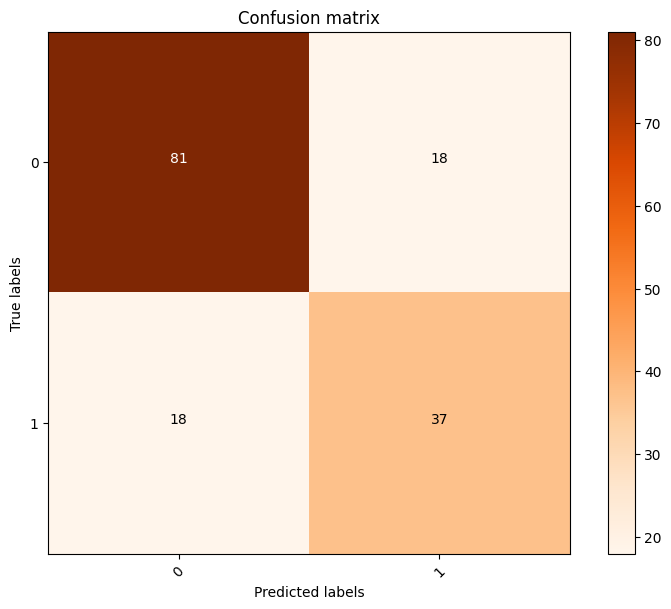

In [191]:
cmap = plt.get_cmap('Oranges')

plt.figure(figsize=(8, 6))
plt.imshow(cm_xgb, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(('0', '1')))
plt.xticks(tick_marks, ('0', '1'), rotation=45)
plt.yticks(tick_marks, ('0', '1'))

normalize = False
if normalize:
  cm_xgb = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]

thresh = cm_xgb.max() / 1.5 if normalize else cm_xgb.max() / 2
for i, j in itertools.product(range(cm_xgb.shape[0]), range(cm_xgb.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm_xgb[i, j]),
                  horizontalalignment="center",
                  color="white" if cm_xgb[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm_xgb[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_xgb[i, j] > thresh else "black")


plt.tight_layout()
#plt.ylim(len(('0', '1'))-0.5, -0.5)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.savefig('Confusion Matrix' + '.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [192]:
auc_xgb = roc_auc_score(y_test, preds_xgb)
print('AUC: ', round(auc_xgb, 4))

AUC:  0.7455


In [193]:
fpr, tpr, thresholds = roc_curve(y_test, preds_xgb)

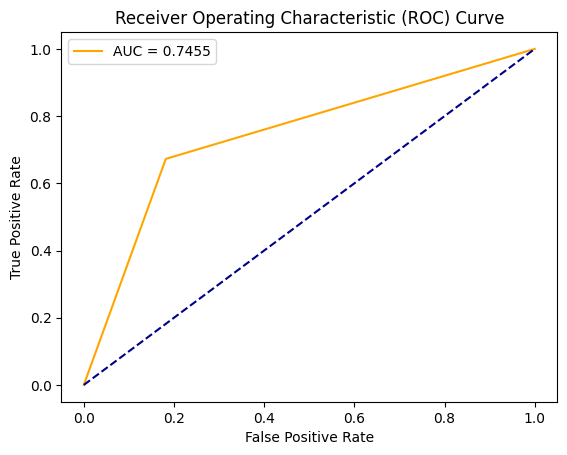

In [194]:
plt.plot(fpr, tpr, color='orange', label='AUC = ' + str(round(auc_xgb, 4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Evaluation Results of Machine Learing Models**

In [195]:
Models={"Models":['Logistic Regression', 'Support Vector Machine (SVM)', 'Decision Trees', 'Random Forest', 'K-Nearest Neighbors (kNN)',
                  'Naive Bayes', 'Extra Tree Classifier', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
       "Training Accuracy":[train_acc_logreg, train_acc_svc, train_acc_dt, train_acc_rf, train_acc_knn, train_acc_nb, train_acc_et, train_acc_gb, train_acc_ada, train_acc_xgb],
        "Testing Accuracy":[test_acc_logreg, test_acc_svc, test_acc_dt, test_acc_rf, test_acc_knn, test_acc_nb, test_acc_et, test_acc_gb, test_acc_ada, test_acc_xgb],
        "Precision":[precision_logreg, precision_svc, precision_dt, precision_rf, precision_knn, precision_nb, precision_et, precision_gb, precision_ada, precision_xgb],
        "Recall":[recall_logreg, recall_svc, recall_dt, recall_rf, recall_knn, recall_nb, recall_et, recall_gb, recall_ada, recall_xgb],
        "F1 Score":[f1_logreg, f1_svc, f1_dt, f1_rf, f1_knn, f1_nb, f1_et, f1_gb, f1_ada, f1_xgb],
        "AUC": [auc_logreg, auc_svc,auc_dt, auc_rf, auc_knn, auc_nb, auc_et, auc_gb, auc_ada, auc_xgb],
        "Training Time": [logreg_train_time, svc_train_time, dt_train_time, rf_train_time, knn_train_time, nb_train_time, et_train_time,
                          gb_train_time, ada_train_time, xgb_train_time],
        "Prediction Time": [logreg_prediction_time, svc_prediction_time, dt_prediction_time, rf_prediction_time,
                            knn_prediction_time, nb_prediction_time, et_prediction_time, gb_prediction_time, ada_prediction_time, xgb_prediction_time]
       }
data = pd.DataFrame(Models)
data = data.sort_values(by='Models', ascending=True)
display(data)

,Models,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,AUC,Training Time,Prediction Time
8,AdaBoost,0.817590,0.759740,0.739976,0.724242,0.730144,0.724242,0.045800,0.023568
2,Decision Trees,0.830619,0.720779,0.702431,0.714141,0.705571,0.714141,0.002231,0.001249
6,Extra Tree Classifier,0.895765,0.766234,0.748260,0.729293,0.736151,0.729293,0.032013,0.023244
7,Gradient Boosting,0.947883,0.740260,0.717172,0.717172,0.717172,0.717172,0.009699,0.005842
4,K-Nearest Neighbors (kNN),0.838762,0.746753,0.725845,0.706061,0.712728,0.706061,0.098579,0.025745
0,Logistic Regression,0.798046,0.759740,0.738520,0.740404,0.739425,0.740404,0.001496,0.001786
5,Naive Bayes,0.765472,0.766234,0.747224,0.757576,0.751078,0.757576,0.001482,0.002696
3,Random Forest,0.931596,0.753247,0.746939,0.733333,0.738688,0.733333,0.019003,0.015714
1,Support Vector Machine (SVM),0.840391,0.753247,0.731179,0.727273,0.729074,0.727273,0.034769,0.009326
9,XGBoost,0.959283,0.766234,0.745455,0.745455,0.745455,0.745455,0.033945,0.010202
